In [12]:
# 06.10 과제_전예원

In [136]:
import numpy as np
import pandas as pd # numpy와 pandas 사용을 위한 라이브러리

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # 평가를 위한 라이브러리

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')

In [137]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')

In [138]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [140]:
train_data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [141]:
# print(train_data.select_dtypes(include=object).columns)
# print(test_data.select_dtypes(include=object).columns)
    # Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
# print(train_data.nunique())
# print(test_data.nunique())
# print(train_data.isnull().sum()) # Age(177), Cabin(687), Embarked(2)
# print(test_data.isnull().sum()) # Age(86), Cabin(327)

# Age 결측값 처리 (평균으로 대체)
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

# Cabin 결측값 처리 (Missing으로 대체)
train_data['Cabin'].fillna('Missing', inplace=True)
test_data['Cabin'].fillna('Missing', inplace=True)

# 결측값이 제대로 처리되었는지 확인
print(train_data.isnull().sum())
print(test_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64


In [142]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X = pd.get_dummies(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [143]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(C=1.0),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

model_names = []
train_scores = []
val_scores = []

In [144]:
for model in models:
    model_names.append(model.__class__.__name__)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model.fit(X_train_scaled, y_train)
    
    train_score = model.score(X_train_scaled, y_train)
    val_score = model.score(X_val_scaled, y_val)
    train_scores.append(train_score)
    val_scores.append(val_score)

result_df = pd.DataFrame({
    'Model': model_names,
    'Train Score': train_scores,
    'Validation Score': val_scores
})
print(result_df)

best_model_index = np.argmax(val_scores)
best_model = models[best_model_index]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
best_model.fit(X_train_scaled, y)

submission_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId']
})

                        Model  Train Score  Validation Score
0          LogisticRegression     1.000000          0.742537
1        KNeighborsClassifier     0.494382          0.451493
2                         SVC     0.991974          0.619403
3      DecisionTreeClassifier     1.000000          0.805970
4      RandomForestClassifier     1.000000          0.809701
5  GradientBoostingClassifier     0.878010          0.820896


## 강사님 코드

In [220]:
import numpy as np
import pandas as pd # numpy와 pandas 사용을 위한 라이브러리

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # 평가를 위한 라이브러리

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='AppleGothic')

In [221]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [222]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
print(train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [224]:
print(train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [225]:
for dataset in [train, test]:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1

In [226]:
print(train[['Family', 'Survived']].groupby(['Family'], as_index=False).mean())

   Family  Survived
0       1  0.303538
1       2  0.552795
2       3  0.578431
3       4  0.724138
4       5  0.200000
5       6  0.136364
6       7  0.333333
7       8  0.000000
8      11  0.000000


In [227]:
for dataset in [train, test]:
    dataset['IsAlone']=0
    dataset.loc[dataset['Family']==1, 'IsAlone']=1

print(train[['IsAlone', 'Survived']].groupby(['IsAlone']).mean())

         Survived
IsAlone          
0        0.505650
1        0.303538


In [228]:
for dataset in [train, test]:
    #print(dataset['Embarked'].value_counts()) # S가 최빈값이다.
    #따라서 결측치를 최빈값으로 대체하고자 한다.
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

print(train[['Embarked', 'Survived']].groupby(['Embarked']).mean())

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009


In [229]:
for dataset in [train, test]:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())

train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print(train[['CategoricalFare', 'Survived']].groupby('CategoricalFare').mean())

                 Survived
CategoricalFare          
(-0.001, 7.91]   0.197309
(7.91, 14.454]   0.303571
(14.454, 31.0]   0.454955
(31.0, 512.329]  0.581081


In [230]:
# 나이는 mean-std와 mean+std 사이의 난수를 생성
for dataset in [train, test]:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_cnt = dataset['Age'].isnull().sum()

    age_random = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_cnt)
    dataset['Age'][np.isnan(dataset['Age'])] = age_random
    dataset['Age'] = dataset['Age'].astype(int)

train['CategoricalAge'] = pd.qcut(train['Age'], 5)
print(train[['CategoricalAge', 'Survived']].groupby('CategoricalAge').mean())

                Survived
CategoricalAge          
(-0.001, 19.0]  0.452632
(19.0, 25.0]    0.324022
(25.0, 32.0]    0.379679
(32.0, 40.0]    0.385057
(40.0, 80.0]    0.372671


In [231]:
import re as re # 정규식 사용을 위해

def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)

    if title_search:
        return title_search.group(1)
    return ""

for dataset in [train, test]:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))
print(pd.crosstab(test['Title'], test['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2


In [232]:
for dataset in [train, test]:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Dona'])

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print(train[['Title', 'Survived']].groupby(['Title']).mean())

        Survived
Title           
Master  0.575000
Miss    0.700535
Mr      0.164486
Mrs     0.775194


In [233]:
for dataset in [train, test]:
    dataset['Sex'] = dataset['Sex'].map({'female':0, 'male':1}).astype(int)

    title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

    # 요금과 나이(구간 직접 지정)
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4

In [234]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,IsAlone,CategoricalFare,CategoricalAge,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,2,0,"(-0.001, 7.91]","(19.0, 25.0]",1


In [235]:
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Family']

train = train.drop(drop_elements, axis=1) # axis = 1 : 열 기준
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis=1)

test = test.drop(drop_elements, axis=1)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
0,0,3,1,1,0,0,0,1
1,1,1,0,2,3,1,0,3
2,1,3,0,1,1,0,1,2
3,1,1,0,2,3,0,0,3
4,0,3,1,2,1,0,1,1


In [236]:
# 모델 별 정확도 그래프 그리기
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit # 계층적 분리
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [237]:
train_values = train.values
test_values = test.values

In [238]:
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KMeans(n_clusters=3),
    GaussianNB()]

In [247]:
log = pd.DataFrame(columns=['Classifier', 'Accuracy'])
log

,Classifier,Accuracy


In [248]:
# 계층적 샘플링 : 데이터셋을 여러 개의 범위로 구분하여 각 범위에서 n개씩 랜덤하게 추출하는 방법
# n_splits : 분리할 데이터 셋의 개수 지정
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=42)

In [249]:
X = train_values[:, 1:]
y = train_values[:, 0]

acc_dict = {}

In [250]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for clf in classifiers:
        # KMeans의 값을 높이기 위한 작업 필요
        name = clf.__class__.__name__

        if name == 'Kmeans':
            clf.fit(X_train) # Kmeans에서 X_train을 통해 fir 처리(X_train에 대한 클러스터링 처리)(중심점 처리)
            train_pred = clf.predict(X_test)

            unique_clusters = np.unique(clf.labels_) # 클러스터 번호 추출
            cluster_label = {}
            for cluster in unique_clusters:
                cluster_label[cluster] = np.bincount(y_train[clf.labels_ == cluster]).argmax() # bincount : 빈도수 계산
            train_pred = np.array([cluster_label[pred] for pred in train_pred]) # 클러스터 번호별로 실제 레이블로 변환
            
        else:
            clf.fit(X_train, y_train)
            train_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, train_pred)

        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

In [251]:
acc_dict

{'KNeighborsClassifier': 7.8999999999999995,
 'DecisionTreeClassifier': 7.8999999999999995,
 'RandomForestClassifier': 7.899999999999999,
 'KMeans': 3.4555555555555557,
 'GaussianNB': 7.7333333333333325}

In [252]:
for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=['Classifier', 'Accuracy'])
    log = pd.concat([log, log_entry], ignore_index=True)

In [253]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.790000
1,DecisionTreeClassifier,0.790000
2,RandomForestClassifier,0.790000
3,KMeans,0.345556
4,GaussianNB,0.773333


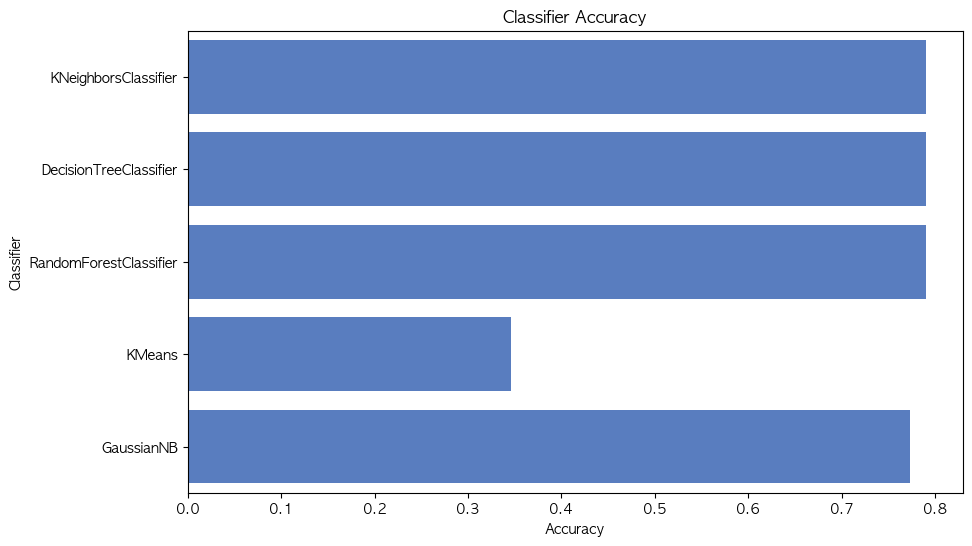

In [254]:
plt.figure(figsize=(10, 6))
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes('muted')
sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')
plt.show()

In [260]:
from sklearn.model_selection import train_test_split

model = RandomForestClassifier(n_estimators=100, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(y_pred)

[1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0]
[1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0]
[1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0]
[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0]
[0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1]
[1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1
 0 0 

In [ ]:
test['Survived'] = y_pred
test.head()